# Цель проекта:

В этом проекте мы будете работать с датасетом, содержащим сведения о 40 000 ресторанах Европы, а модель, которую мы будем обучать, должна будет предсказывать рейтинг ресторана по данным сайта TripAdvisor на основе имеющихся в датасете данных.

### Первоначальная версия датасета состоит из десяти столбцов, содержащих следующую информацию:

- Restaurant_id — идентификационный номер ресторана / сети ресторанов;
- City — город, в котором находится ресторан;
- Cuisine Style — кухня или кухни, к которым можно отнести блюда, предлагаемые в ресторане;
- Ranking — место, которое занимает данный ресторан среди всех ресторанов своего города;
- Rating — рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- Price Range — диапазон цен в ресторане;
- Number of Reviews — количество отзывов о ресторане;
- Reviews — данные о двух отзывах, которые отображаются на сайте ресторана;
- URL_TA — URL страницы ресторана на TripAdvosor;
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
%matplotlib inline

pd.set_option('display.max_rows', 50) # выведем больше строк
pd.set_option('display.max_columns', 50) # выведем больше колонок
main = pd.read_csv('main_task.csv')
display(main.head(5))

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


# 1) ПЕРВИЧНАЯ ОБРАБОТКА ДАННЫХ.

### Для удобства переименуем столбцы:

In [2]:
main=main.rename(columns={'Restaurant_id': 'id', 'City': 'city','Cuisine Style': 'cuisine', 'Ranking': 'ranking','Rating': 'rating','Price Range': 'price_range','Number of Reviews': 'number_reviews','Reviews': 'reviews','URL_TA': 'url','ID_TA': 'id_ta'})
display(main.head(5))

,id,city,cuisine,ranking,rating,price_range,number_reviews,reviews,url,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


### Рассмотрим, какие типы данных у столбцов и сколько пропусков:

In [3]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
id                40000 non-null object
city              40000 non-null object
cuisine           30717 non-null object
ranking           40000 non-null float64
rating            40000 non-null float64
price_range       26114 non-null object
number_reviews    37457 non-null float64
reviews           40000 non-null object
url               40000 non-null object
id_ta             40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [4]:
main.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,40000,11909,id_436,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
city,40000,31,London,5757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine,30717,9007,['Italian'],1032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ranking,40000,NaN,NaN,NaN,3676.03,3708.75,1,973,2285,5260,16444
rating,40000,NaN,NaN,NaN,3.99304,0.668417,1,3.5,4,4.5,5
price_range,26114,3,$$ - $$$,18412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_reviews,37457,NaN,NaN,NaN,124.825,295.666,2,9,33,115,9660
reviews,40000,33516,"[[], []]",6471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,40000,39980,/Restaurant_Review-g187514-d8753348-Reviews-Tr...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
id_ta,40000,39980,d3161682,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### На первый взгляд, в датасете 3 числовых столбца:
- Ranking              40000 non-null float64
- Rating               40000 non-null float64
- Number of Reviews    37457 non-null float64

Для корректной работы все данные в датафрейме должны быть в форматах int или float. 
Есть и ещё одно жёсткое ограничение: в столбцах не должно быть None-значений. 

На первом этапе для создания такого датафрейма мы просто удалим столбцы, содержащие данные типа object, и заполним пропущенные значения (None или NaN) каким-то одним значением (нулём или средним арифметическим) для  всего столбца.

In [5]:
#Посмотрим сколько пропусков для каждого признака
main.isnull().sum()

id                    0
city                  0
cuisine            9283
ranking               0
rating                0
price_range       13886
number_reviews     2543
reviews               0
url                   0
id_ta                 0
dtype: int64

###  Пропуски в'number_reviews' возможно означают отсутствие отзывов. Поэтому заполним их нулями:

In [6]:
main.number_reviews.fillna(0, inplace=True)
main.isnull().sum()

id                    0
city                  0
cuisine            9283
ranking               0
rating                0
price_range       13886
number_reviews        0
reviews               0
url                   0
id_ta                 0
dtype: int64

## Рассмотрим все столбцы по отдельности:

# 1) id
- идентификационный номер ресторана / сети ресторанов
- non-null object - пропусков нет. 
- Посмотрим, нет ли ошибок в датасете

### Заменим формат на числовой

In [7]:
main['id'] = main['id'].str.replace('id_', '')
main['id'] = main['id'].astype('float')
display(main.head(5))

,id,city,cuisine,ranking,rating,price_range,number_reviews,reviews,url,id_ta
0,5569.0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,1535.0,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,352.0,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,3456.0,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,615.0,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


Если мы присмотримся, то увидим что два столбца очень похожи друг на друга: 'id' и 'ranking', Посмотрим на матрицу корреляции:

In [8]:
main.corr()

,id,ranking,rating,number_reviews
id,1.000000,1.000000,-0.368308,-0.222036
ranking,1.000000,1.000000,-0.368371,-0.222072
rating,-0.368308,-0.368371,1.000000,0.026924
number_reviews,-0.222036,-0.222072,0.026924,1.000000


### Вывод:
- Т.к. значения сильно скорелированны, но этот столбец нам нужен в дальнейшем, поэтому мы его оставим

# 2) сity
- non-null object - пропусков нет. 
- Посмотрим, нет ли ошибок в датасете.
- Посмотрим на распределение.

In [9]:
main.city.value_counts(dropna=False, normalize=True)

London        0.143925
Paris         0.122425
Madrid        0.077700
Barcelona     0.068350
Berlin        0.053875
Milan         0.053325
Rome          0.051950
Prague        0.036075
Lisbon        0.032500
Vienna        0.029150
Amsterdam     0.027150
Brussels      0.026500
Hamburg       0.023725
Munich        0.022325
Lyon          0.022300
Stockholm     0.020500
Budapest      0.020400
Warsaw        0.018175
Dublin        0.016825
Copenhagen    0.016475
Athens        0.015700
Edinburgh     0.014900
Zurich        0.013450
Oporto        0.012825
Geneva        0.012025
Krakow        0.011075
Oslo          0.009625
Helsinki      0.009400
Bratislava    0.007525
Luxembourg    0.005250
Ljubljana     0.004575
Name: city, dtype: float64

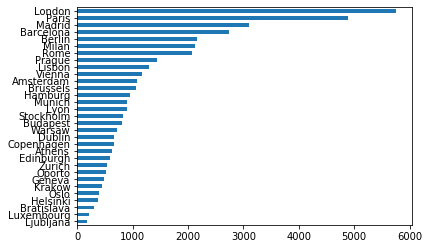

In [10]:
main['city'].value_counts(dropna = False, ascending=True).plot(kind='barh')

'city'  это категориальный признак, а для дальейшей работы модели, нам нужны числа:

С помощью интернета найдем численность городов и добавим еще один критерий (в тыс.). Источник: https://dic.academic.ru/dic.nsf/ruwiki/1295572:

In [11]:
population_city= {'London' : 8174, 'Paris' : 2204, 'Madrid' : 3213, 'Barcelona' : 1616, 
                        'Berlin' : 3431, 'Milan' : 1297, 'Rome' : 2711, 'Prague' : 1222, 
                        'Lisbon' : 510, 'Vienna' : 1550, 'Amsterdam' : 743, 'Brussels' : 148, 
                        'Hamburg' : 1777, 'Munich' : 1327, 'Lyon' : 472, 'Stockholm' : 810, 
                        'Budapest' : 1702, 'Warsaw' : 1720, 'Dublin' : 506, 
                        'Copenhagen' : 529, 'Athens' : 746, 'Edinburgh' : 525, 
                        'Zurich' : 374, 'Oporto' : 240, 'Geneva' : 185, 'Krakow' : 756, 
                        'Oslo' : 579, 'Helsinki' : 578, 'Bratislava' : 425, 
                        'Luxembourg' : 473, 'Ljubljana' : 280}
main['population_city'] = main.apply(lambda row: population_city[row['city']], axis = 1)

Перекодируем все города в цифры:

In [12]:
region_dictionary = {'Amsterdam':0,
 'Athens': 1,
 'Barcelona': 2,
 'Berlin': 3,
 'Bratislava': 4,
 'Brussels': 5,
 'Budapest': 6,
 'Copenhagen': 7,
 'Dublin': 8,
 'Edinburgh': 9,
 'Geneva': 10,
 'Hamburg': 11,
 'Helsinki': 12,
 'Krakow': 13,
 'Lisbon': 14,
 'Ljubljana': 15,
 'London': 16,
 'Luxembourg': 17,
 'Lyon': 18,
 'Madrid': 19,
 'Milan': 20,
 'Munich': 21,
 'Oporto': 22,
 'Oslo': 23,
 'Paris': 24,
 'Prague': 25,
 'Rome': 26,
 'Stockholm': 27,
 'Vienna': 28,
 'Warsaw': 29,
 'Zurich': 30}
main['city_number'] = main['city'].apply(lambda x: region_dictionary[x])

### Вывод: 
- Столбец без ошибок и дублей.
- Как видим больше всего ресторанов в Лондоне и Париже.
- Создали дополнительный признак по численности населения города.
- Перекодировали все значения в числа.

In [13]:
display(main.head(5))

,id,city,cuisine,ranking,rating,price_range,number_reviews,reviews,url,id_ta,population_city,city_number
0,5569.0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2204,24
1,1535.0,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,810,27
2,352.0,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8174,16
3,3456.0,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,3431,3
4,615.0,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1327,21


# 3) cuisine

- В данном столбце 23% пропущенных значений. Т.к. процент большой и мы не можем заменить их на `моду` или `среднее`, то мы просто создадим новое значение `other`.
- Избавимся от `[]` и `''`

In [14]:
main.cuisine.value_counts(dropna=False, normalize=True)

NaN                                                                                                                         0.232075
['Italian']                                                                                                                 0.025800
['French']                                                                                                                  0.020125
['Spanish']                                                                                                                 0.017375
['French', 'European']                                                                                                      0.010125
                                                                                                                              ...   
['Italian', 'Fast Food', 'Mediterranean', 'Delicatessen', 'Vegetarian Friendly', 'Vegan Options', 'Gluten Free Options']    0.000025
['Fast Food', 'Delicatessen', 'Healthy', 'Soups']                    

In [15]:
#main['cuisine_na'] = pd.isnull(main['cuisine']).astype('float64') 
#main['cuisine'] = main['cuisine'].fillna('other')
#pd.DataFrame(main.cuisine.value_counts(dropna=False, normalize=True))

In [16]:
#Замена пропущенных значений:
from collections import Counter
main['cuisine'].fillna('other', inplace=True)
main['cuisine_list']=main['cuisine'].str.strip("'[]").str.split("', '")
s=list(Counter(main['cuisine'].str.strip("'[]").str.split("', '").sum()))
#Число различных кухонь
count_cuisine=len(s)-1
#Наиболее часто встречающаяся кухня
cuisine_top=Counter(main['cuisine'].str.strip("'[]").str.split("', '").sum()).most_common(1)
cuisine_top

[('Vegetarian Friendly', 11189)]

In [17]:
#Кол-во кухонь, представленных в ресторане
main['cuisine_count']=main['cuisine_list'].str.len()

In [18]:
display(main.head(5))

,id,city,cuisine,ranking,rating,price_range,number_reviews,reviews,url,id_ta,population_city,city_number,cuisine_list,cuisine_count
0,5569.0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2204,24,"[European, French, International]",3
1,1535.0,Stockholm,other,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,810,27,[other],1
2,352.0,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8174,16,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7
3,3456.0,Berlin,other,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,3431,3,[other],1
4,615.0,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1327,21,"[German, Central European, Vegetarian Friendly]",3


### Выводы:
- Мы заменили пропуски в столбце на `other`
- Добавили новые столбцы:
        - `cuisine_count` - количество кухонь в ресторанах
        - `cuisine_list`- создали список кухонь в ресторанах
- Выяснили, что наиболее встречаемая кухняв ресторанах `Vegetarian Friendly`. Неожиданно))

# 4) ranking — 
- место, которое занимает данный ресторан среди всех ресторанов своего города.
- это числовой столбец без пропусков.
- посмотрим на его распределение.
- посмотрим на связь этого параметра с городами.

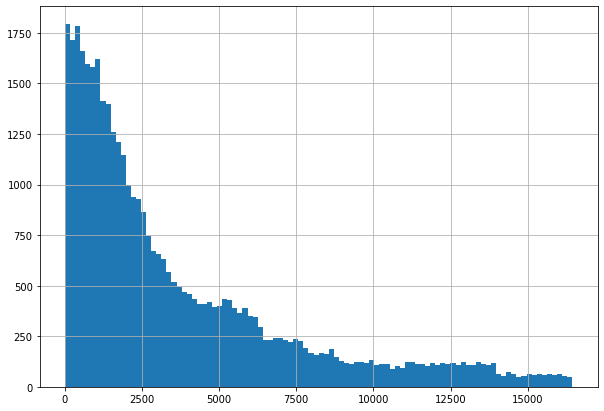

In [19]:
plt.rcParams['figure.figsize'] = (10,7)
main['ranking'].hist(bins=100)

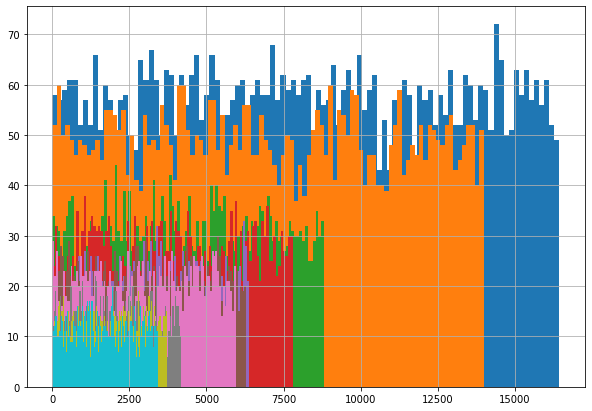

In [20]:
for x in (main['city'].value_counts())[0:10].index:
    main['ranking'][main['city'] == x].hist(bins=100)
plt.show()

Как мы видим распределение нормальное и скорее всего зависит от размера города, чем больше город, тем больше там ресторанов.

Чтобы этот параметр можно было соотносить с ranking в других городах- нормируем его.

In [21]:
# найдём для каждого города максимальный и средний ranking
max_ranking_on_city = main.groupby(['city'])['ranking'].max() 
mean_ranking_on_city = main.groupby(['city'])['ranking'].mean()
std_ranking_on_city = main.groupby(['city'])['ranking'].std()
 
#Создадим новые признакми:
#Количество ресторанов в городе:
main['max_ranking_on_city'] = main['city'].apply(lambda x: max_ranking_on_city[x])

#Средний рейтинг в городе:
main['mean_ranking_on_city'] = main['city'].apply(lambda x: mean_ranking_on_city[x])
    
#Cтандартное отклонение в рейтинге города.
main['std_restorant_in_city'] = main['city'].apply(lambda x: std_ranking_on_city[x])


In [22]:
display(main.head(5))

,id,city,cuisine,ranking,rating,price_range,number_reviews,reviews,url,id_ta,population_city,city_number,cuisine_list,cuisine_count,max_ranking_on_city,mean_ranking_on_city,std_restorant_in_city
0,5569.0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2204,24,"[European, French, International]",3,13986.0,6933.012048,4045.728867
1,1535.0,Stockholm,other,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,810,27,[other],1,2464.0,1242.386585,723.422474
2,352.0,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8174,16,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7,16444.0,8198.461873,4734.698715
3,3456.0,Berlin,other,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,3431,3,[other],1,6372.0,3266.237123,1817.662549
4,615.0,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1327,21,"[German, Central European, Vegetarian Friendly]",3,2763.0,1370.539754,808.676383


### Выводы: 

- числовой признак без пропусков.
- распределение нормальное.
- сгенерировали новые признаки:
    - max_ranking_on_city - количество ресторанов в городе.
    - mean_ranking_on_city - средний рейтинг в городе.
    - std_restorant_in_city - стандартное отклонение в рейтинге города.

# 5) rating
- рейтинг ресторана по данным TripAdvisor (именно это значение должна будет предсказывать модель);
- числовой столбец без пропусков.
- посмотрим на распределение.

count    40000.000000
mean         3.993037
std          0.668417
min          1.000000
25%          3.500000
50%          4.000000
75%          4.500000
max          5.000000
Name: rating, dtype: float64

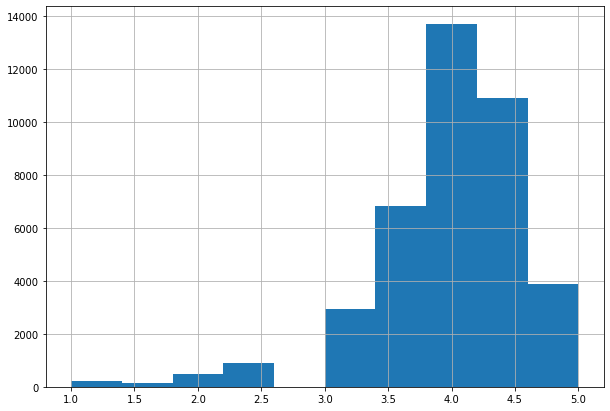

In [23]:
main.rating.hist()
main.rating.describe()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C52EAC388>]],
      dtype=object)

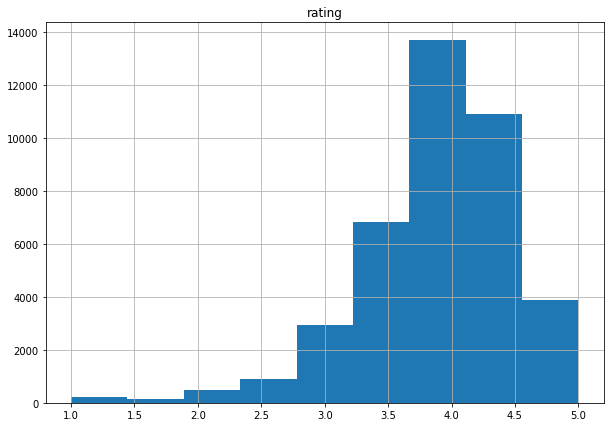

In [24]:
#так распределение выглядит красивее, без разрывов
main.hist(column = 'rating', bins = len(main.rating.value_counts()))

Скорее всего тут есть выбросы:

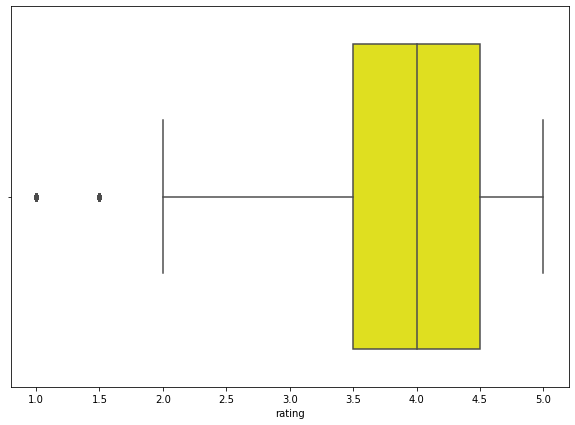

In [25]:
sns.boxplot(main.rating, color='yellow');

### Выводы:
- это наш целевой числовой столбец.
- есть выбросы.

# 6) price_range
- диапазон цен в ресторане.
- 26114 non-null object. Есть пропуски (13886)
- посмотрим распределение:

In [28]:
#Заполним значения в переменной по словарю:
price = {'$':1,'$$ - $$$':2,'$$$$':3}
main['price']=main['price_range'].map(lambda x: price.get(x,x))
main.price.describe()

count    26114.000000
mean         1.814046
std          0.510263
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: price, dtype: float64

Т.к. половина ресторанов имеют среднюю цену (2), то и пропуски заменим на это значение:

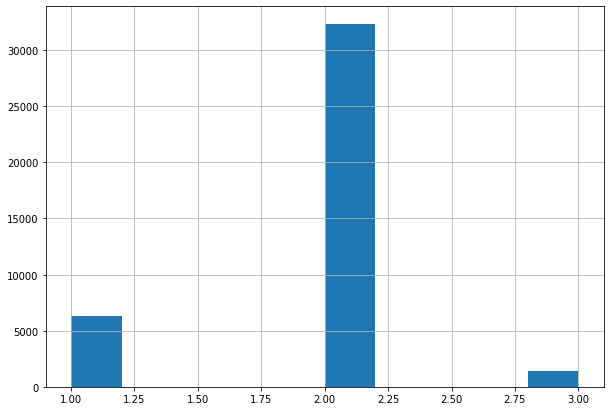

In [29]:
main['price'] = main['price'].fillna(2)
main.price.describe()
main.price.hist()

### Выводы:
- В переменной очень много пропусков 34.7%.
- Cоздан новый признак числового кодирования цены - `price` (низкая цена - 1, средняя цена -2 , высокая цена - 3). 
- Пропуски заполнили модой `2`.

In [30]:
display(main.head(5))

,id,city,cuisine,ranking,rating,price_range,number_reviews,reviews,url,id_ta,population_city,city_number,cuisine_list,cuisine_count,max_ranking_on_city,mean_ranking_on_city,std_restorant_in_city,price
0,5569.0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2204,24,"[European, French, International]",3,13986.0,6933.012048,4045.728867,2.0
1,1535.0,Stockholm,other,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,810,27,[other],1,2464.0,1242.386585,723.422474,2.0
2,352.0,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8174,16,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7,16444.0,8198.461873,4734.698715,3.0
3,3456.0,Berlin,other,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,3431,3,[other],1,6372.0,3266.237123,1817.662549,2.0
4,615.0,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1327,21,"[German, Central European, Vegetarian Friendly]",3,2763.0,1370.539754,808.676383,2.0


# 7) number_reviews
- Количество отзывов о ресторане
- 37457 non-null float64. Есь пропуски (2543 (6%))
- Посморим распределение.


count    40000.000000
mean       116.889700
std        287.729821
min          0.000000
25%          7.000000
50%         28.000000
75%        105.000000
max       9660.000000
Name: number_reviews, dtype: float64

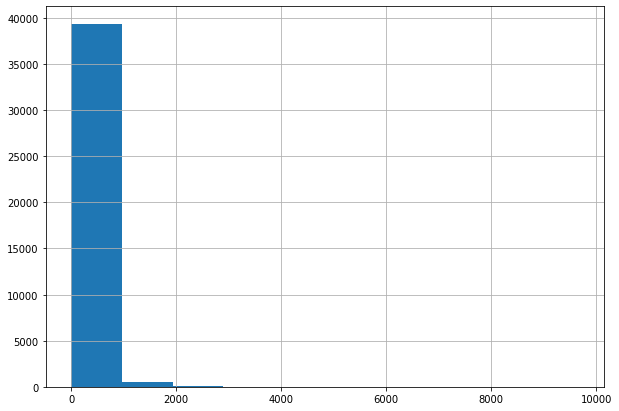

In [31]:
main.number_reviews.hist()
main.number_reviews.describe()

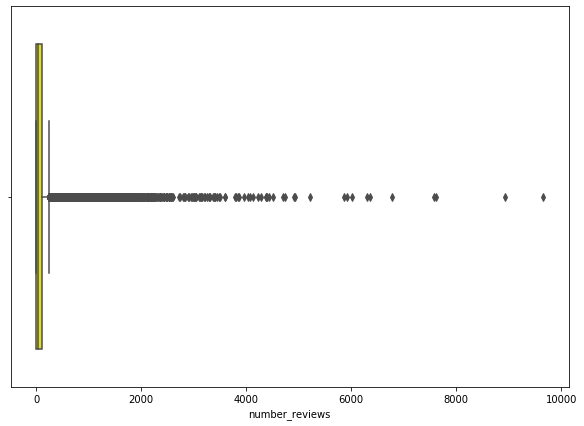

In [32]:
sns.boxplot(main.number_reviews, color='yellow');

Метод межквартильного расстояния выделяет как выбросы все значения, находящиеся за пределами коробки. 
Посмотрим, сколько выбросов он найдет.

In [33]:
def outliers_iqr(ys):
    #находим квартили
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    #находим межквартильное расстояние
    iqr = quartile_3 - quartile_1
    #нижняя граница коробки
    lower_bound = quartile_1 - (iqr * 1.5)
    #верхняя граница коробки
    upper_bound = quartile_3 + (iqr * 1.5)
    #возращаем только те значения и их индексы, ктр больше upper_bound и меньше lower_bound
    return ys[((ys > upper_bound) | (ys < lower_bound))]

out = outliers_iqr(main.number_reviews)
#кол-во выбросов
len(out)

4758

In [34]:
# выделю медиану и среднее количество отзывов по городу
main = main.assign(city_mean_reviews = main.groupby('city')['number_reviews'].transform(np.mean))
main = main.assign(city_median_reviews = main.groupby('city')['number_reviews'].transform(np.median))

In [35]:
# заполню пустые значения медианой по городу 
main['number_reviews'].fillna(main.city_median_reviews, inplace = True)

In [36]:
#Посмотрим сколько сейчас пропусков:
main.isnull().sum()

id                           0
city                         0
cuisine                      0
ranking                      0
rating                       0
price_range              13886
number_reviews               0
reviews                      0
url                          0
id_ta                        0
population_city              0
city_number                  0
cuisine_list                 0
cuisine_count                0
max_ranking_on_city          0
mean_ranking_on_city         0
std_restorant_in_city        0
price                        0
city_mean_reviews            0
city_median_reviews          0
dtype: int64

### Вывод:
- В столбце было 6% пропусков, которые мы заменили на `моду`.
- В данном столбце много выбросов, но мы их не будем удалять, т.к. это отзывы и они существенно влияют на рейтинг ресторанов.

# 8) reviews:
- данные о двух отзывах, которые отображаются на сайте ресторана;
- это категориальный столбец.

In [37]:
#Нет пропусков, но много строк со значением [[], []]. По сути это пустые строки сохраним их:
main['empty_reviews'] = (main['reviews']=='[[], []]').astype('float64')

In [38]:
# есть пропуски, и есть значение [[], []], что есть пропуск:
main['reviews'] = main['reviews'].fillna('[[], []]')
main['reviews_na'] = (main['reviews']=='[[], []]').astype('float64')

In [39]:
#Cоздадим новый столбец:
main['date_of_review'] = main['reviews'].str.findall('\d+/\d+/\d+')

In [40]:
# Признак количества обзоров:
main['reviews_number'] = main['date_of_review'].apply(lambda x: len(x))

#Признак, если нет обзоров:
main['no_reviews'] = (main['reviews_number'] == 0).astype('float64')

In [41]:
display(main.head(5))

,id,city,cuisine,ranking,rating,price_range,number_reviews,reviews,url,id_ta,population_city,city_number,cuisine_list,cuisine_count,max_ranking_on_city,mean_ranking_on_city,std_restorant_in_city,price,city_mean_reviews,city_median_reviews,empty_reviews,reviews_na,date_of_review,reviews_number,no_reviews
0,5569.0,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643,2204,24,"[European, French, International]",3,13986.0,6933.012048,4045.728867,2.0,114.650602,41.0,0.0,0.0,"[12/31/2017, 11/20/2017]",2,0.0
1,1535.0,Stockholm,other,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032,810,27,[other],1,2464.0,1242.386585,723.422474,2.0,72.042683,16.0,0.0,0.0,"[07/06/2017, 06/19/2016]",2,0.0
2,352.0,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781,8174,16,"[Japanese, Sushi, Asian, Grill, Vegetarian Fri...",7,16444.0,8198.461873,4734.698715,3.0,129.605524,31.0,0.0,0.0,"[01/08/2018, 01/06/2018]",2,0.0
3,3456.0,Berlin,other,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776,3431,3,[other],1,6372.0,3266.237123,1817.662549,2.0,60.225522,14.0,1.0,1.0,[],0,1.0
4,615.0,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963,1327,21,"[German, Central European, Vegetarian Friendly]",3,2763.0,1370.539754,808.676383,2.0,75.365062,25.0,0.0,0.0,"[11/18/2017, 02/19/2017]",2,0.0


### Выводы:
- В данном стобце не было пропусков, но были пустые значения с `[[, ]]`, что приравнивается к пропускам.
- Создали несколько новых признаков:
    - `reviews_na` - количество пропусков.
    - `date_of_review` - дата обзора.
    - `reviews_number` - количество обзоров.
    - `no_reviews` - нет обзоров.

## 9) url:
- URL страницы ресторана на TripAdvosor.
- Этот столбец нам не понадобиться для модели.

## 10) id_ta:
- ID_TA — идентификатор ресторана в базе данных TripAdvisor.
- Этот столбец нам также не понадобиться для модели

## Итоги:
- Мы убрали пустые значения.
- Создали новые признаки.
- И подготовим наш датасет к созданию модели.

In [42]:
main.describe(include=['object'])

,city,cuisine,price_range,reviews,url,id_ta,cuisine_list,date_of_review
count,40000,40000,26114,40000,40000,40000,40000,40000
unique,31,9008,3,33516,39980,39980,9008,24606
top,London,other,$$ - $$$,"[[], []]",/Restaurant_Review-g187514-d8753348-Reviews-Tr...,d3161682,[other],[]
freq,5757,9283,18412,6471,2,2,9283,6471


In [43]:
#удаление категориальных столбцов
main_ready = main.drop(['city', 'cuisine', 'price_range', 'reviews', 
                  'url', 'id_ta', 'cuisine_list', 'date_of_review'], axis = 1)

main_ready.isnull().describe()

,id,ranking,rating,number_reviews,population_city,city_number,cuisine_count,max_ranking_on_city,mean_ranking_on_city,std_restorant_in_city,price,city_mean_reviews,city_median_reviews,empty_reviews,reviews_na,reviews_number,no_reviews
count,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000


In [44]:
display(main_ready.head(5))

,id,ranking,rating,number_reviews,population_city,city_number,cuisine_count,max_ranking_on_city,mean_ranking_on_city,std_restorant_in_city,price,city_mean_reviews,city_median_reviews,empty_reviews,reviews_na,reviews_number,no_reviews
0,5569.0,5570.0,3.5,194.0,2204,24,3,13986.0,6933.012048,4045.728867,2.0,114.650602,41.0,0.0,0.0,2,0.0
1,1535.0,1537.0,4.0,10.0,810,27,1,2464.0,1242.386585,723.422474,2.0,72.042683,16.0,0.0,0.0,2,0.0
2,352.0,353.0,4.5,688.0,8174,16,7,16444.0,8198.461873,4734.698715,3.0,129.605524,31.0,0.0,0.0,2,0.0
3,3456.0,3458.0,5.0,3.0,3431,3,1,6372.0,3266.237123,1817.662549,2.0,60.225522,14.0,1.0,1.0,0,1.0
4,615.0,621.0,4.0,84.0,1327,21,3,2763.0,1370.539754,808.676383,2.0,75.365062,25.0,0.0,0.0,2,0.0


# 2. Создание, обучение и тестирование модели.

### Разделение датафрейма.

Прежде всего для создания модели необходимо разделить датафрейм на набор данных, которые мы будем использовать для обучения модели (X), и на целевую переменную, т.е. величину, значение которой мы будем предсказывать (y).

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели).  Такое деление осуществляется с помощью специального метода, входящего в состав библиотеки Scikit-Learn (sklearn). В параметрах метода мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25% или 0.25.

In [52]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х - данные с информацией о ресторанах, у - целевая переменная (рейтинги ресторанов)  
X = main_ready.drop(['id', 'rating'], axis = 1)  
y = main_ready['rating']  

In [53]:
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  

In [54]:
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" - для тестирования.  
# Для тестирования мы будем использовать 25% от исходного датасета. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [55]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  

In [56]:
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  

In [57]:
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [58]:
# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)  

In [59]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются  
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.  
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  

MAE: 0.21089449999999998


# ВЫВОДЫ:
- Мы создали свою первую модель с отклонением в 0.21.
- Посмотрии какие признаки больше всего повлияли на модель:

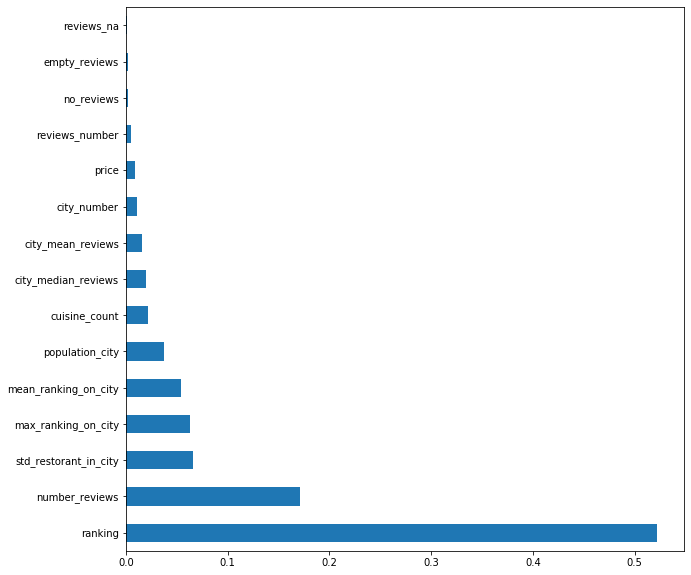

In [64]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(regr.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

"Количество отзывов" и "место, которое занимает ресторан среди всех ресторанов своего города" наиболее сильно влияют на нашую ключеную переменную "Рейтинг"